In [127]:
file = open('instance_files/instance_3radii_iceagg_allrand_100xtalstot_20phi_r10_1000agg', 'rb')
b1 = pickle.load(file)
file = open('instance_files/instance_3radii_iceagg_allflat_100xtalstot_20phi_r10_1000agg', 'rb')
b2 = pickle.load(file)

In [128]:
phiba_rand = b1.rxs/b1.rzs
phica_rand = b1.rys/b1.rzs
phiba_flat = b2.rxs/b2.rzs
phica_flat = b2.rys/b2.rzs

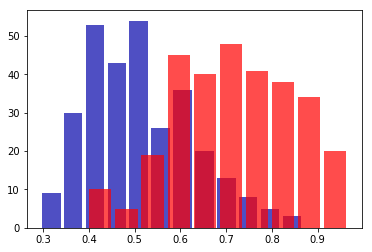

In [80]:
n, bins, patches = plt.hist(phiba[10,:,2], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
n, bins, patches = plt.hist(phica[10,:,2], bins='auto', color='r',
                            alpha=0.7, rwidth=0.85)

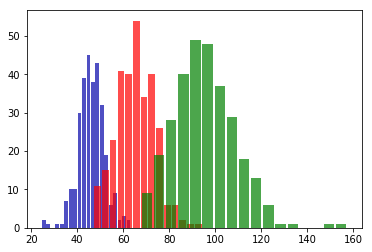

In [81]:
#axes rand plates
n, bins, patches = plt.hist(b1.rxs[1,:,2], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
n, bins, patches = plt.hist(b1.rys[1,:,2], bins='auto', color='r',
                            alpha=0.7, rwidth=0.85)
n, bins, patches = plt.hist(b1.rzs[1,:,2], bins='auto', color='g',
                            alpha=0.7, rwidth=0.85)

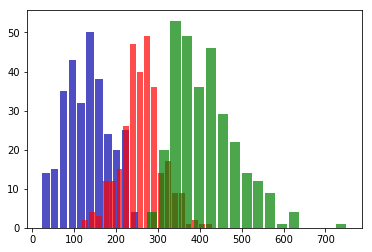

In [82]:
#axes rand columns 
n, bins, patches = plt.hist(b1.rxs[19,:,2], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
n, bins, patches = plt.hist(b1.rys[19,:,2], bins='auto', color='r',
                            alpha=0.7, rwidth=0.85)
n, bins, patches = plt.hist(b1.rzs[19,:,2], bins='auto', color='g',
                            alpha=0.7, rwidth=0.85)

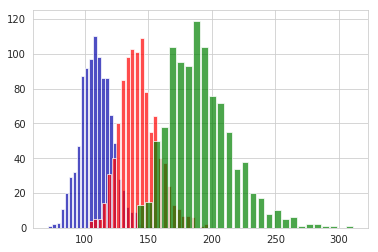

In [266]:
n, bins, patches = plt.hist(b1.rxs[1,:,19], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
n, bins, patches = plt.hist(b1.rys[1,:,19], bins='auto', color='r',
                            alpha=0.7, rwidth=0.85)
n, bins, patches = plt.hist(b1.rzs[1,:,19], bins='auto', color='g',
                            alpha=0.7, rwidth=0.85)

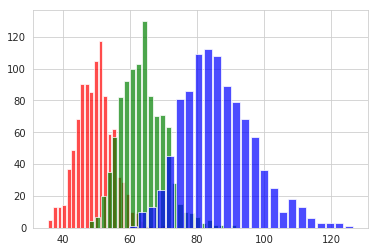

In [278]:
n, bins, patches = plt.hist(a[10,:,19], bins='auto', color='r',
                            alpha=0.7, rwidth=0.85)
n, bins, patches = plt.hist(b[10,:,19], bins='auto', color='g',
                            alpha=0.7, rwidth=0.85)
n, bins, patches = plt.hist(c[10,:,19], bins='auto', color='b',
                            alpha=0.7, rwidth=0.85)


In [6]:
a = np.zeros((20,1000,98))
b = np.zeros((20,1000,98))
c = np.zeros((20,1000,98))

for phi in np.arange(20):
    print(phi)
    for i in np.arange(1000):
        for N in np.arange(98):
            a[phi,i,N], b[phi,i,N], c[phi,i,N] = sorted([b1.rxs[phi,i,N], b1.rys[phi,i,N], b1.rzs[phi,i,N]], reverse=True)
            '''
            a[phi,i,N] = max(b1.rxs[phi,i,N], b1.rys[phi,i,N], b1.rzs[phi,i,N])
            c[phi,i,N] = min(b1.rxs[phi,i,N], b1.rys[phi,i,N], b1.rzs[phi,i,N])
            if b1.rxs[phi,i,N] != a[phi,i,N] and b1.rxs[phi,i,N] != c[phi,i,N]:
                b[phi,i,N] = b1.rxs[phi,i,N]
                
            elif b1.rys[phi,i,N] != a[phi,i,N] and b1.rys[phi,i,N] != c[phi,i,N]:        
                b[phi,i,N] = b1.rys[phi,i,N]
                
            else:   
                b[phi,i,N] = b1.rzs[phi,i,N]
            '''
              
print(np.shape(b))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
(20, 1000, 98)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


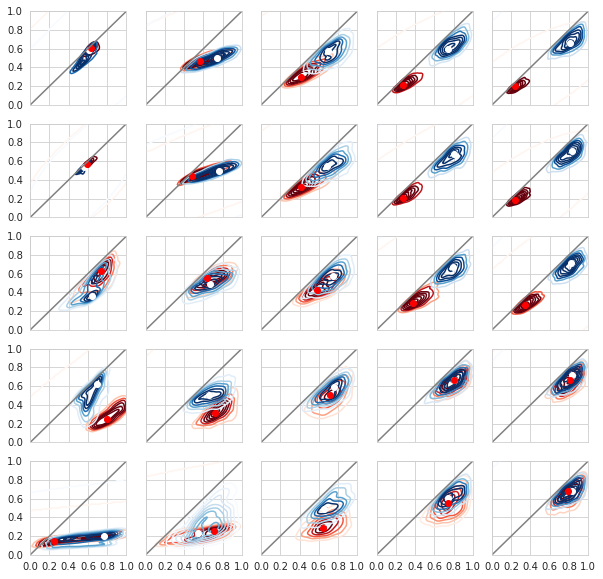

In [154]:
fig, axes = plt.subplots(5,5, figsize=(10,10), sharex=True, sharey=True)
Ns = [0,1,8,48,98]
phios = [10, 8, 11, 5, 14] #1.27, .483, 2.069, .113, 8.86
#fig = plt.figure()
sns.set_style('whitegrid')
axs = axes.ravel()
start=0
end=19
i=0
for phio in phios:
    for N in Ns:
        print(i)
        data_rand = np.vstack([phica_rand[phio,:,N], phiba_rand[phio,:,N]])
        kde_rand = stats.gaussian_kde(data_rand)
        data_flat = np.vstack([phica_flat[phio,:,N], phiba_flat[phio,:,N]])
        kde_flat = stats.gaussian_kde(data_flat)
        
        # evaluate on a regular grid
        xgrid = np.arange(0.0, 1.01, 0.01)
        ygrid = np.arange(0.0, 1.01, 0.01)
        Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
        Z_rand = kde_rand.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
        Z_rand = Z_rand.reshape(Xgrid.shape)
        Z_flat = kde_flat.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
        Z_flat = Z_flat.reshape(Xgrid.shape)
        
        #img = axs[i].imshow(Z_rand, origin='lower', aspect='auto',
        #           cmap='Blues', vmin=1, vmax=10)
        img = axs[i].contour(Z_flat, cmap='Reds', vmin=1, vmax=10)
        img = axs[i].contour(Z_rand, cmap='Blues', vmin=1, vmax=10)
        
        #modes
        modes_rand = np.where(Z_rand==np.max(Z_rand))
        modes_flat = np.where(Z_flat==np.max(Z_flat))
        axs[i].plot(float(modes_rand[1]), float(modes_rand[0]), 'wo')
        axs[i].plot(float(modes_flat[1]), float(modes_flat[0]), 'ro')
        
        
    #     for x,y in zip(xs[start:end],ys[start:end]):
    #         ax.plot(x*100,y*100, "r+")
    #     start+=19
    #     end+=19
        axs[i].plot(np.linspace(0.0,100,10),np.linspace(0.0,100,10), 'gray', '--', zorder=2)
        axs[i].set_xticks([0,20,40,60,80,100])
        axs[i].set_yticks([0,20,40,60,80,100])
        axs[i].set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
        axs[i].set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
        i+=1
#cb = plt.colorbar(img, ax=axs[i-1], format='%.1f')
# m = plt.cm.ScalarMappable(cmap='Reds')
# m.set_array(Z_flat)
# m.set_clim(0., 10.)
# c = plt.cm.ScalarMappable(cmap='Blues')
# c.set_array(Z_rand)
# c.set_clim(0., 10.)
# plt.colorbar(m, boundaries=np.linspace(0, 10, 6))
# plt.colorbar(c, boundaries=np.linspace(0, 10, 6))


fig.savefig('phi_ba_ca_iceagg_N_flat_pdfs.eps');


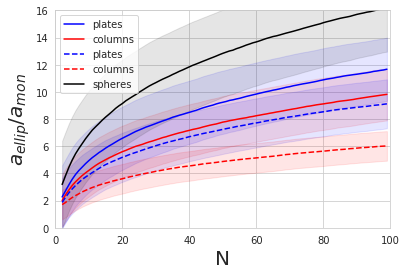

In [392]:
#random orientation, ice-agg
#a_ellipse (rzs) to a_mono (length for columns, width for plates)
phios = [8, 11, 5, 14,10]
Ns = np.arange(0,98,1)
Nslab = np.arange(2, 100, 1)
for phio in phios:
    ellipse_ratio=[]
    for N in Ns:
        if phio <= 10.0: #plates
            ellipse_ratio.append(np.mean(a[phio,:,N])/np.mean(b1.width[phio]))
        else: #columns
            ellipse_ratio.append(np.mean(a[phio,:,N])/np.mean(b1.length[phio]))

    if ('%.2f')%b1.phio[phio] == str(1.27): 
        label='spheres'
        color = 'k'
        linestyle='-'
    if ('%.2f')%b1.phio[phio] == str(0.48):
        label='plates'
        color = 'b'
        linestyle=None
        zorder = 2
    if ('%.2f')%b1.phio[phio] == str(2.07):
        label='columns'
        color='r'
        linestyle=None
    if ('%.2f')%b1.phio[phio] == str(0.11):
        label = 'plates'
        color = 'b'
        linestyle = '--'
    if ('%.2f')%b1.phio[phio] == str(8.86):
        label='columns'
        color='r'
        linestyle='--'
    
    
    plt.plot(Nslab, ellipse_ratio, label=label, color=color, linestyle=linestyle)
    plt.fill_between(Nslab, ellipse_ratio-np.std(ellipse_ratio), ellipse_ratio+np.std(ellipse_ratio), alpha = 0.1, color=color)
    plt.ylim(0,16)
    plt.xlim(0,100)
    plt.ylabel('$a_{ellip}/a_{mon}$', fontsize = 20)
    plt.xlabel('N', fontsize=20)
    plt.legend()

    
#columns and plates are not initialized with the same axis lengths in order 
#to keep the equivalent volume radius constant

#within columns and plates, we are dividing my the same length magnitudes for a_mon

#dashed lines dividing by a larger a_mon, but also scales faster with N since longer

0.04
8.86
1.27


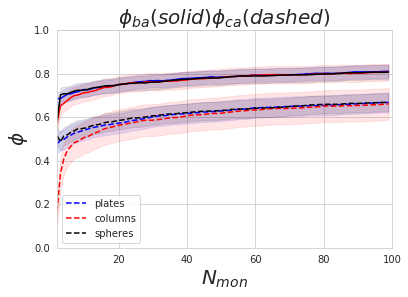

In [397]:
phios = [3, 14, 10]
Ns = np.arange(0,98,1)
Nslab = np.arange(2, 100, 1)
for phio in phios:
    phibaplt=[]
    phicaplt=[]
    print(('%.2f')%b1.phio[phio])
    for N in Ns:
        phibaplt.append(np.mean(b[phio,:,N]/a[phio,:,N]))
       
        phicaplt.append(np.mean(c[phio,:,N]/a[phio,:,N]))
    
    if ('%.2f')%b1.phio[phio] == str(1.27): 
        label='spheres'
        color = 'k'
        linestyle='-'
    if ('%.2f')%b1.phio[phio] == str(0.04):
        label='plates'
        color = 'b'
        linestyle=None
        zorder = 2
    if ('%.2f')%b1.phio[phio] == str(2.07):
        label='columns'
        color='r'
        linestyle=None
    if ('%.2f')%b1.phio[phio] == str(0.11):
        label = 'plates'
        color = 'b'
        linestyle = '--'
    if ('%.2f')%b1.phio[phio] == str(8.86):
        label='columns'
        color='r'
        linestyle='--'
    
    plt.plot(Nslab, phibaplt, color=color, linestyle=None)
    plt.plot(Nslab, phicaplt, label=label, color=color, linestyle='--')
    
    plt.fill_between(Nslab, phibaplt-np.std(phibaplt), phibaplt+np.std(phibaplt), alpha = 0.1, color=color)
    plt.fill_between(Nslab, phicaplt-np.std(phicaplt), phicaplt+np.std(phicaplt), alpha = 0.1, color=color)

plt.ylim(0,1.0)
plt.xlim(2,100)
plt.ylabel('$\phi$', fontsize = 20)
plt.title('$\phi_{ba} (solid) \phi_{ca} (dashed)$', fontsize = 20)
plt.xlabel('$N_{mon}$', fontsize=20)
plt.legend()

0.04
8.86
1.27


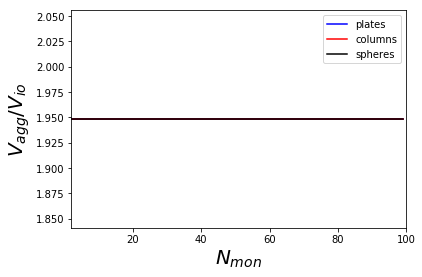

In [13]:
#rhoio = Vagg/Vio
phios = [3, 14, 10]
Ns = np.arange(0,98,1)
Nslab = np.arange(2, 100, 1)
for phio in phios:
    rhoio=[]
    print(('%.2f')%b1.phio[phio])
    for N in Ns:
        #rhoio.append(np.mean((4./3.)*np.pi*a[phio,:,N]*b[phio,:,N]*c[phio,:,N]/((4./3.)*np.pi*a[phio,:,N]**3.)))
        if phio < ..
        
            rhoio.append(np.mean((3.*np.sqrt(3.)/2.)*np.power(a[phio,:,N]*b[phio,:,N]*c[phio,:,N]/((4./3.)*a[phio,:,N]*b[phio,:,N]*c[phio,:,N])))
        else:
            
    if ('%.2f')%b1.phio[phio] == str(1.27): 
        label='spheres'
        color = 'k'
        linestyle='-'
    if ('%.2f')%b1.phio[phio] == str(0.04):
        label='plates'
        color = 'b'
        linestyle=None
        zorder = 2
    if ('%.2f')%b1.phio[phio] == str(2.07):
        label='columns'
        color='r'
        linestyle=None
    if ('%.2f')%b1.phio[phio] == str(0.11):
        label = 'plates'
        color = 'b'
        linestyle = '--'
    if ('%.2f')%b1.phio[phio] == str(8.86):
        label='columns'
        color='r'
        linestyle='--'
    
    plt.plot(Nslab, rhoio, label=label, color=color, linestyle='-')
    
    plt.fill_between(Nslab, rhoio-np.std(rhoio), rhoio+np.std(rhoio), alpha = 0.1, color=color)

#plt.ylim(0,1.0)
plt.xlim(2,100)
plt.ylabel('$V_{agg}/V_{io}$', fontsize = 20)
plt.xlabel('$N_{mon}$', fontsize=20)
plt.legend()
#Vagg = (3.*np.sqrt(3.)/2)* np.power(b1.width, 2)*b1.length*100

In [95]:
file = open('instance_3radii_iceagg_allflat_40xtalstot_20phi_r10', 'rb')
b1 = pickle.load(file)

In [25]:
b5.ch_req_shape = b5.ch_req.reshape(28, 20, 40)[:,:,:-1]
b5.ch_majorax_shape = b5.ch_majorax.reshape(28, 20, 40)[:,:,:-1]
b5.ch_minorax_shape = b5.ch_minorax.reshape(28, 20, 40)[:,:,:-1]
b5.chphi_shape = b5.chphi.reshape(28, 20, 40)[:,:,:-1]
b5.ch_dd_shape = b5.ch_dd.reshape(28, 20, 40)[:,:,:-1] 

In [30]:
phioarr=np.logspace(-2, 2, num=20, dtype=None)#just columns (0,2); plates (-2,0)
#phioarr = phioarr[1:]
reqarr = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000]
ncrystals=39

f1 = open('find_N_lookup_iceagg_flat_rall.dat',"w")
f2 = open('major_axis_lookup_iceagg_flat_rall.dat',"w")
f3 = open('minor_axis_lookup_iceagg_flat_rall.dat',"w")
f4 = open('dd_lookup_iceagg_flat_rall.dat',"w")

for i in range(len(reqarr)):
    for j in range(len(phioarr)):   
        for N in range((ncrystals)):
            #f1.write('%.3f\t %.1f\t %.4f\t %10.4f\t\n'%(b1.phioarr[j], reqarr[i], b1.chphi[N], b1.ch_req[N]))
            f1.write('{:8.4f} {:8.2f} {:8.4f} {:10.2f}\n'.format(b5.phioarr[j], reqarr[i], b5.chphi_shape[i,j,N], b5.ch_req_shape[i,j,N]))
            #f2.write('%.3f\t %.1f\t %.4f\t\n'%(b1.phioarr[j], reqarr[i], b1.ch_majorax[N]))
            f2.write('{:8.4f} {:8.2f} {:10.2f}\n'.format(b5.phioarr[j], reqarr[i], b5.ch_majorax_shape[i,j,N]))
            #print(b1.phioarr[j], reqarr[i], b1.ch_majorax[N])
           
            #minor_axis
            f3.write('{:8.4f} {:8.2f} {:8.4f}\n'.format(b5.phioarr[j], reqarr[i], b5.ch_minorax_shape[i,j,N]))
            #f3.write('%.3f\t %.1f\t %.4f\t\n'%(b1.phioarr[j], reqarr[i], b1.ch_minorax[N]))
            #density change
            f4.write("{:8.4f} {:8.2f} {:8.4f}\n".format(b5.phioarr[j], reqarr[i], b5.ch_dd_shape[i,j,N]))
            #f4.write('%5.3f\t %5.1f\t %.5f\t\n'%(b1.phioarr[j], reqarr[i], b1.ch_dd[N]))
            
f1.close()
f2.close()
f3.close()
f4.close()

In [149]:
b4.which_plot(plot_name='req_contour', nclusters=300, ch_dist='gamma', savefile='req_iceagg_40tot_rand')

In [147]:
b5.which_plot(plot_name='req_contour', nclusters=300, ch_dist='gamma', savefile='req_iceagg_40tot_flat')
#direction of max r is different for phi=100 than phi =0.9. spreading hor for 100, vertical for 0.9

In [156]:
b1.which_plot(plot_name='phi_contour', nclusters=300, ch_dist='gamma', savefile='phi_aggagg_40tot_rand')

10
(20, 38)
